In [126]:
#Importing Libraries

import pandas as pd
import numpy as np
import joblib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [127]:
#Reading Restaurant Review dataset and making a dataframe 

data = pd.read_csv('/content/Restaurant_Reviews.tsv', sep = '\t')
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


# PROCESSING THE DATA AND VISUALIZATION

In [128]:
#Review column of the dataset

data["Review"]

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [129]:
#Liked column of the dataset
#1 means positive
#0 means negative

data["Liked"]

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [130]:
data["Liked"].value_counts() #Dataset is balanced

1    500
0    500
Name: Liked, dtype: int64

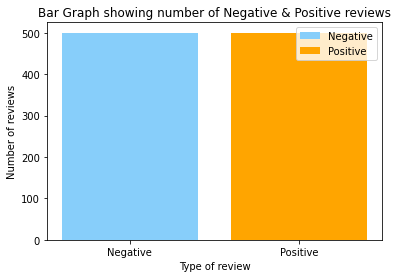

In [131]:
#Bar Graph count plot for the dataset

plt.bar("Negative", data["Liked"].value_counts()[0], color = 'lightskyblue')
plt.bar("Positive", data["Liked"].value_counts()[1], color = 'orange')

plt.xlabel("Type of review")
plt.ylabel("Number of reviews")

plt.title("Bar Graph showing number of Negative & Positive reviews")

plt.legend(["Negative", "Positive"], loc = 'best')

plt.savefig("Bar_Graph")
plt.show()

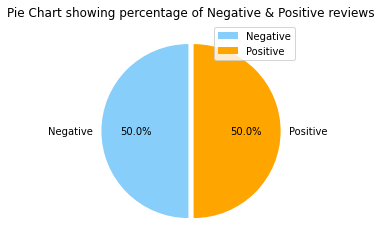

In [132]:
#Pie Chart plot for the dataset

plt.pie(data["Liked"].value_counts(), labels=["Negative", "Positive"], 
        startangle=90, explode = [0.03,0.03], autopct = '%1.1f%%', 
        colors = ['lightskyblue', 'orange'])

plt.title("Pie Chart showing percentage of Negative & Positive reviews")

plt.legend(loc = "best")

plt.savefig("Pie_Chart")
plt.show()

In [133]:
X = data["Review"]
y = data["Liked"]

In [134]:
X

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [135]:
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [136]:
#Performing train test split on X & y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [137]:
X_train

703    Our server was very nice and attentive as were...
311    She ordered a toasted English muffin that came...
722    The food was great as always, compliments to t...
629    The staff is always super friendly and helpful...
0                               Wow... Loved this place.
                             ...                        
106    The food was delicious, our bartender was atte...
270        The Veggitarian platter is out of this world!
860    This place is pretty good, nice little vibe in...
435    It was a huge awkward 1.5lb piece of cow that ...
102    Best Buffet in town, for the price you cannot ...
Name: Review, Length: 670, dtype: object

In [138]:
X_test

521                     If you haven't gone here GO NOW!
737    Try them in the airport to experience some tas...
740    The restaurant is very clean and has a family ...
660    I personally love the hummus, pita, baklava, f...
411                Come hungry, leave happy and stuffed!
                             ...                        
506           Overall I wasn't very impressed with Noca.
342    The vegetables are so fresh and the sauce feel...
485    This isn't a small family restaurant, this is ...
711                                        Not my thing.
133                              The management is rude.
Name: Review, Length: 330, dtype: object

In [139]:
y_train

703    1
311    0
722    1
629    1
0      1
      ..
106    1
270    1
860    1
435    0
102    1
Name: Liked, Length: 670, dtype: int64

In [140]:
y_test

521    1
737    1
740    1
660    1
411    1
      ..
506    0
342    1
485    1
711    0
133    0
Name: Liked, Length: 330, dtype: int64

In [141]:
#Count Vectorizing X_train and X_test

vect = CountVectorizer(stop_words = 'english')

X_train_vect = vect.fit_transform(X_train)
X_test_vect = vect.transform(X_test)

In [142]:
X_train_vect

<670x1440 sparse matrix of type '<class 'numpy.int64'>'
	with 3352 stored elements in Compressed Sparse Row format>

In [143]:
X_test_vect

<330x1440 sparse matrix of type '<class 'numpy.int64'>'
	with 1132 stored elements in Compressed Sparse Row format>

In [144]:
#TF-IDF Vectorizing X_train and X_test

vect_tfidf = TfidfVectorizer(stop_words = 'english')

X_train_tfidf = vect_tfidf.fit_transform(X_train)
X_test_tfidf = vect_tfidf.transform(X_test)

In [145]:
X_train_tfidf

<670x1440 sparse matrix of type '<class 'numpy.float64'>'
	with 3352 stored elements in Compressed Sparse Row format>

In [146]:
X_test_tfidf

<330x1440 sparse matrix of type '<class 'numpy.float64'>'
	with 1132 stored elements in Compressed Sparse Row format>

# Method 1: Creating Count Vectorizer and SVC model separately

In [147]:
#Creating SVC model

model_svc = SVC()

In [148]:
#Training the model

model_svc.fit(X_train_vect, y_train)

SVC()

In [149]:
#Predicting the outcome based on the trained model

y_pred_svc = model_svc.predict(X_test_vect)

In [150]:
y_pred_svc

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,

In [151]:
y_test

521    1
737    1
740    1
660    1
411    1
      ..
506    0
342    1
485    1
711    0
133    0
Name: Liked, Length: 330, dtype: int64

In [152]:
#Checking the accuracy of model

accuracy_score(y_pred_svc, y_test)

0.7606060606060606

In [153]:
#Confusion matrix based on actual and predicted data

confusion_matrix(y_test, y_pred_svc)

array([[144,  29],
       [ 50, 107]])

In [154]:
#Printing Classification Report of the model

print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78       173
           1       0.79      0.68      0.73       157

    accuracy                           0.76       330
   macro avg       0.76      0.76      0.76       330
weighted avg       0.76      0.76      0.76       330



# Method 2: Creating Count Vectorizer and SVC model Pipeline

In [155]:
#Creating Count Vectorizer & SVC Pipeline model

model_svc_pl = make_pipeline(CountVectorizer(),SVC())

In [156]:
#Training the model

model_svc_pl.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [157]:
#Predicting the outcome based on the trained model

y_pred_svc_pl = model_svc_pl.predict(X_test)

In [158]:
y_pred_svc_pl

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,

In [159]:
y_test

521    1
737    1
740    1
660    1
411    1
      ..
506    0
342    1
485    1
711    0
133    0
Name: Liked, Length: 330, dtype: int64

In [160]:
#Checking the accuracy of model

accuracy_score(y_pred_svc_pl, y_test)

0.7696969696969697

In [161]:
#Confusion matrix based on actual and predicted data

confusion_matrix(y_test, y_pred_svc_pl)

array([[122,  51],
       [ 25, 132]])

In [162]:
#Printing Classification Report of the model

print(classification_report(y_test, y_pred_svc_pl))

              precision    recall  f1-score   support

           0       0.83      0.71      0.76       173
           1       0.72      0.84      0.78       157

    accuracy                           0.77       330
   macro avg       0.78      0.77      0.77       330
weighted avg       0.78      0.77      0.77       330



# Method 3: Creating Count Vectorizer and Logistic Regression model separately

In [163]:
#Creating Logistic Regression model

model_lr = LogisticRegression(max_iter = 1000)

In [164]:
#Training the model

model_lr.fit(X_train_vect, y_train)

LogisticRegression(max_iter=1000)

In [165]:
#Predicting the outcome based on the trained model

y_pred_lr = model_lr.predict(X_test_vect)

In [166]:
y_pred_lr

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [167]:
y_test

521    1
737    1
740    1
660    1
411    1
      ..
506    0
342    1
485    1
711    0
133    0
Name: Liked, Length: 330, dtype: int64

In [168]:
#Checking the accuracy of model

accuracy_score(y_pred_lr, y_test)

0.7787878787878788

In [169]:
#Confusion matrix based on actual and predicted data

confusion_matrix(y_test, y_pred_lr)

array([[138,  35],
       [ 38, 119]])

In [170]:
#Printing Classification Report of the model

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       173
           1       0.77      0.76      0.77       157

    accuracy                           0.78       330
   macro avg       0.78      0.78      0.78       330
weighted avg       0.78      0.78      0.78       330



# Method 4: Creating Count Vectorizer and Logistic Regression model Pipeline

In [171]:
#Creating Count Vectorizer & Logistic Regression Pipeline model

model_lr_pl = make_pipeline(CountVectorizer(), LogisticRegression())

In [172]:
#Training the model

model_lr_pl.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('logisticregression', LogisticRegression())])

In [173]:
#Predicting the outcome based on the trained model

y_pred_lr_pl = model_lr_pl.predict(X_test)

In [174]:
y_pred_lr_pl

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,

In [175]:
y_test

521    1
737    1
740    1
660    1
411    1
      ..
506    0
342    1
485    1
711    0
133    0
Name: Liked, Length: 330, dtype: int64

In [176]:
#Checking the accuracy of model

accuracy_score(y_pred_lr_pl, y_test)

0.796969696969697

In [177]:
#Confusion matrix based on actual and predicted data

confusion_matrix(y_test, y_pred_lr_pl)

array([[135,  38],
       [ 29, 128]])

In [178]:
#Printing Classification Report of the model

print(classification_report(y_test, y_pred_lr_pl))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       173
           1       0.77      0.82      0.79       157

    accuracy                           0.80       330
   macro avg       0.80      0.80      0.80       330
weighted avg       0.80      0.80      0.80       330



# Method 5: Creating Count Vectorizer and NB model separately

In [179]:
#Creating NB model

model_nb = MultinomialNB()

In [180]:
#Training the model

model_nb.fit(X_train_vect, y_train)

MultinomialNB()

In [181]:
#Predicting the outcome based on the trained model

y_pred_nb = model_nb.predict(X_test_vect)

In [182]:
y_pred_nb

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,

In [183]:
y_test

521    1
737    1
740    1
660    1
411    1
      ..
506    0
342    1
485    1
711    0
133    0
Name: Liked, Length: 330, dtype: int64

In [184]:
#Checking the accuracy of model

accuracy_score(y_pred_nb, y_test)

0.7606060606060606

In [185]:
#Confusion matrix based on actual and predicted data

confusion_matrix(y_test, y_pred_nb)

array([[120,  53],
       [ 26, 131]])

In [186]:
#Printing Classification Report of the model

print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75       173
           1       0.71      0.83      0.77       157

    accuracy                           0.76       330
   macro avg       0.77      0.76      0.76       330
weighted avg       0.77      0.76      0.76       330



# Method 6: Creating Count Vectorizer and NB model Pipeline

In [187]:
#Creating Count Vectorizer & NB Pipeline model

model_nb_pl = make_pipeline(CountVectorizer(), MultinomialNB())

In [188]:
#Training the model

model_nb_pl.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [189]:
#Predicting the outcome based on the trained model

y_pred_nb_pl = model_nb_pl.predict(X_test)

In [190]:
y_pred_nb_pl

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,

In [191]:
y_test

521    1
737    1
740    1
660    1
411    1
      ..
506    0
342    1
485    1
711    0
133    0
Name: Liked, Length: 330, dtype: int64

In [192]:
#Checking the accuracy of model

accuracy_score(y_pred_nb_pl, y_test)

0.806060606060606

In [193]:
#Confusion matrix based on actual and predicted data

confusion_matrix(y_test,y_pred_nb_pl)

array([[146,  27],
       [ 37, 120]])

In [194]:
#Printing Classification Report of the model

print(classification_report(y_test, y_pred_nb_pl))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       173
           1       0.82      0.76      0.79       157

    accuracy                           0.81       330
   macro avg       0.81      0.80      0.80       330
weighted avg       0.81      0.81      0.81       330



# Method 7: Creating TF-IDF Vectorizer and SVC model separately

In [195]:
#Creating SVC model

model_svc_tfidf = SVC()

In [196]:
#Training the model

model_svc_tfidf.fit(X_train_tfidf, y_train)

SVC()

In [197]:
#Predicting the outcome based on the trained model

y_pred_svc_tfidf = model_svc_tfidf.predict(X_test_tfidf)

In [198]:
y_pred_svc_tfidf

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,

In [199]:
y_test

521    1
737    1
740    1
660    1
411    1
      ..
506    0
342    1
485    1
711    0
133    0
Name: Liked, Length: 330, dtype: int64

In [200]:
#Checking the accuracy of model

accuracy_score(y_pred_svc_tfidf, y_test)

0.7909090909090909

In [201]:
#Confusion matrix based on actual and predicted data

confusion_matrix(y_test, y_pred_svc_tfidf)

array([[141,  32],
       [ 37, 120]])

In [202]:
#Printing Classification Report of the model

print(classification_report(y_test, y_pred_svc_tfidf))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       173
           1       0.79      0.76      0.78       157

    accuracy                           0.79       330
   macro avg       0.79      0.79      0.79       330
weighted avg       0.79      0.79      0.79       330



# Method 8: Creating TF-IDF Vectorizer and SVC model Pipeline

In [203]:
#Creating TF-IDF Vectorizer & SVC Pipeline model

model_svc_pl_tfidf = make_pipeline(TfidfVectorizer(),SVC())

In [204]:
#Training the model

model_svc_pl_tfidf.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [205]:
#Predicting the outcome based on the trained model

y_pred_svc_pl_tfidf = model_svc_pl_tfidf.predict(X_test)

In [206]:
y_pred_svc_pl_tfidf

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [207]:
y_test

521    1
737    1
740    1
660    1
411    1
      ..
506    0
342    1
485    1
711    0
133    0
Name: Liked, Length: 330, dtype: int64

In [208]:
#Checking the accuracy of model

accuracy_score(y_pred_svc_pl_tfidf, y_test)

0.8242424242424242

In [209]:
#Confusion matrix based on actual and predicted data

confusion_matrix(y_test, y_pred_svc_pl_tfidf)

array([[146,  27],
       [ 31, 126]])

In [210]:
#Printing Classification Report of the model

print(classification_report(y_test, y_pred_svc_pl_tfidf))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       173
           1       0.82      0.80      0.81       157

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.82      0.82      0.82       330



# Method 9: Creating TF-IDF Vectorizer and Logistic Regression model separately

In [211]:
#Creating Logistic Regression Model

model_lr_tfidf = LogisticRegression()

In [212]:
#Training the model

model_lr_tfidf.fit(X_train_tfidf, y_train)

LogisticRegression()

In [213]:
#Predicting the outcome based on the trained model

y_pred_lr_tfidf = model_lr_tfidf.predict(X_test_tfidf)

In [214]:
y_pred_lr_tfidf

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,

In [215]:
y_test

521    1
737    1
740    1
660    1
411    1
      ..
506    0
342    1
485    1
711    0
133    0
Name: Liked, Length: 330, dtype: int64

In [216]:
#Checking the accuracy of model

accuracy_score(y_pred_lr_tfidf, y_test)

0.7818181818181819

In [217]:
#Confusion matrix based on actual and predicted data

confusion_matrix(y_test, y_pred_lr_tfidf)

array([[138,  35],
       [ 37, 120]])

In [218]:
#Printing Classification Report of the model

print(classification_report(y_test, y_pred_lr_tfidf))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       173
           1       0.77      0.76      0.77       157

    accuracy                           0.78       330
   macro avg       0.78      0.78      0.78       330
weighted avg       0.78      0.78      0.78       330



# Method 10: Creating TF-IDF Vectorizer and Logistic Regression model Pipeline

In [219]:
#Creating TF-IDF Vectorizer & Logistic Regression Pipeline model

model_lr_pl_tfidf = make_pipeline(TfidfVectorizer(), LogisticRegression())

In [220]:
#Training the model

model_lr_pl_tfidf.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

In [221]:
#Predicting the outcome based on the trained model

y_pred_lr_pl_tfidf = model_lr_pl_tfidf.predict(X_test)

In [222]:
y_pred_lr_pl_tfidf

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,

In [223]:
y_test

521    1
737    1
740    1
660    1
411    1
      ..
506    0
342    1
485    1
711    0
133    0
Name: Liked, Length: 330, dtype: int64

In [224]:
#Checking the accuracy of model

accuracy_score(y_pred_lr_pl_tfidf, y_test)

0.8

In [225]:
#Confusion matrix based on actual and predicted data

confusion_matrix(y_test, y_pred_lr_pl_tfidf)

array([[138,  35],
       [ 31, 126]])

In [226]:
#Printing Classification Report of the model

print(classification_report(y_test, y_pred_lr_pl_tfidf))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       173
           1       0.78      0.80      0.79       157

    accuracy                           0.80       330
   macro avg       0.80      0.80      0.80       330
weighted avg       0.80      0.80      0.80       330



# Method 11: Creating TF-IDF Vectorizer and NB model separately

In [227]:
#Creating NB Model

model_nb_tfidf = MultinomialNB()

In [228]:
#Training the model

model_nb_tfidf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [229]:
#Predicting the outcome based on the trained model

y_pred_nb_tfidf = model_nb_tfidf.predict(X_test_tfidf)

In [230]:
y_pred_nb_tfidf

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,

In [231]:
y_test

521    1
737    1
740    1
660    1
411    1
      ..
506    0
342    1
485    1
711    0
133    0
Name: Liked, Length: 330, dtype: int64

In [232]:
#Checking the accuracy of model

accuracy_score(y_pred_nb_tfidf, y_test)

0.7696969696969697

In [233]:
#Confusion matrix based on actual and predicted data

confusion_matrix(y_test, y_pred_nb_tfidf)

array([[120,  53],
       [ 23, 134]])

In [234]:
#Printing Classification Report of the model

print(classification_report(y_test, y_pred_nb_tfidf))

              precision    recall  f1-score   support

           0       0.84      0.69      0.76       173
           1       0.72      0.85      0.78       157

    accuracy                           0.77       330
   macro avg       0.78      0.77      0.77       330
weighted avg       0.78      0.77      0.77       330



# Method 12: Creating TF-IDF Vectorizer and NB model Pipeline

In [235]:
#Creating TF-IDF Vectorizer & NB Pipeline model

model_nb_pl_tfidf = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [236]:
#Training the model

model_nb_pl_tfidf.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [237]:
#Predicting the outcome based on the trained model

y_pred_nb_pl_tfidf = model_nb_pl_tfidf.predict(X_test)

In [238]:
y_pred_nb_pl_tfidf

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,

In [239]:
y_test

521    1
737    1
740    1
660    1
411    1
      ..
506    0
342    1
485    1
711    0
133    0
Name: Liked, Length: 330, dtype: int64

In [240]:
#Checking the accuracy of model

accuracy_score(y_pred_nb_pl_tfidf, y_test)

0.8181818181818182

In [241]:
#Confusion matrix based on actual and predicted data

confusion_matrix(y_test, y_pred_nb_pl_tfidf)

array([[141,  32],
       [ 28, 129]])

In [242]:
#Printing Classification Report of the model

print(classification_report(y_test, y_pred_nb_pl_tfidf))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       173
           1       0.80      0.82      0.81       157

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.82      0.82      0.82       330



# **JOBLIB**


**Accuracy Scores**


*   Count Vectorizer & SVC Model Separately - 0.
7606060606060606
*   Count Vectorizer & SVC Model Pipeline - 0.7696969696969697
*   Count Vectorizer & Logistic Regression Model Separately - 0.7787878787878788
*   Count Vectorizer & Logistic Regression Model Pipeline - 0.796969696969697
*   Count Vectorizer & NB Model Separately - 0.7606060606060606
*   Count Vectorizer & NB Model Pipeline - 0.806060606060606
*   TF-IDF Vectorizer & SVC Model Separately - 0.7909090909090909
*   TF-IDF Vectorizer & SVC Model Pipeline - 0.8242424242424242
*   TF-IDF Vectorizer & Logistic Regression Model Separately - 0.7818181818181819
*   TF-IDF Vectorizer & Logistic Regression Model Pipeline - 0.8
*   TF-IDF Vectorizer & NB Model Separately - 0.7696969696969697
*   TF-IDF Vectorizer & NB Model Pipeline - 0.8181818181818182

**Maximum Accuracy: TF-IDF Vectorizer & SVC Model Pipeline - 0.8242424242424242**

In [243]:
#Creating Sentiment Analysis Joblib model based on the most accurate model

joblib.dump(model_svc_pl_tfidf, 'Sentiment Analysis')

['Sentiment Analysis']

In [244]:
#Loading the Sentiment Analysis Joblib model

model = joblib.load('Sentiment Analysis')

In [245]:
model.predict(["Loved the atmosphere the place had. The staff were polite and had a quick service. The food was really delicious as well"])

array([1])

In [246]:
model.predict(["Despite the several recommendations we got, the food and service was of poor quality. Won't recommend"])

array([0])

# **STREAMLIT WEBAPP**

In [247]:
!pip install streamlit --quiet

In [248]:
#Creating Sentiment Analysis Streamlit Webapp and writing it to app.py

%%writefile app.py 

import streamlit as st 
import joblib 

st.title("Sentiment Analysis")

model = joblib.load('Sentiment Analysis')

input1 = st.text_input("Enter the review: ")

if model.predict([input1])[0] == 0:
  output1 = "Negative"
else:
  output1 = "Positive"


if st.button("PREDICT"):   
  st.title([output1])

Overwriting app.py


In [249]:
#Running app.py

!streamlit run app.py  & npx localtunnel --port 8501

2022-08-21 13:01:54.911 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.74.75.42:8501

npx: installed 22 in 3.639s
your url is: https://busy-carrots-remain-34-74-75-42.loca.lt
  Stopping...
^C


# A few lines on Sentiment Analysis and Twitter Sentiments

A few lines on Sentiment Analysis and Twitter Sentiments
Sentiment Analysis is the method of deciding the sentimental impressions of any statement, opinions or attitude towards a given topic. The sentimental impressions can be broadly classified as negative, neutral and positive. In a machine learning environment, Natural Language Processing (NLP) is used to determine the sentimental impressions of any statement. NLP refers to giving computers the ability to understand and interpret the spoken words and text used by us in our day-to-day life.

Sentiment Analysis help brands determine what type of reviews they are receiving, whether positive, negative or neutral. It saves hundreds of laborious hours of manually going through each review to understand the general consensus towards a brand.

One such use of Sentiment Analysis is using machine learning for understanding Twitter Sentiments. Social media platforms, like Twitter, have millions of posts made every single day, allowing for an enormous and ever-growing dataset. Also, Twitter's limit of 280 characters per post makes it easier and less resource demanding to perform NLP and analyze sentiments. In addition to that, Twitter has people of all age groups and from a diverse background, improving the quality and variety of data in the dataset.